# The Mission Statement 
A MedTech company has 5 NHS hospitals registered and needs to give some insight to the board of directors and provide feedback to clinicians. 

 To tackle the tasks, I broke down my methods into different phases:

<b>Phase 1: <u>Identify Business Task</u> </b>
- What are the business tasks we want to achieve?
- Who are the stakeholders? (Who is this analysis for ?)

<b>Phase 2: <u>Determine the credibility of the data </u> </b>
- Understanding the data
- Determine if data cleaning is required

<b>Phase 3: <u>Process the data </u> </b>
- to answer each task in the challenge
- provide enough information for the stakeholders to answer the business tasks
    

## <b>Phase 1: <u>Identify Business Task</u> </b>

### Business task:

1. Understand the PROMs, as it gives strong indicator for clinician to understand the well-being of the patients
2. Understand the user, easier for board of directors to make deicisons.

The Challenge (listed below) gives us some direction for the data analysis to help achieve the business tasks.


### Key stakeholders:
1. Board of directors
2. Clinician

***
### Challenge
Build and present a one or two page dashboard that answers the below questions:

- How many users do we have?
- How many users have joined us each month?
- How many users have completed at least 1 PROM?
- How many PROMs are completed each week/month? You can decide on the cadence.
- How many users have each condition?
- What other data attributes would you like to see in the data set, what else could be useful?

#### Bonus
- How many users do we have in each age group; 0-25, 26-50, 51-70, 70+
- Are there any other interesting trends you have noticed?

#### Assumptions
- All data required for this challenge is in the 3 .csv files provided.
- A PROM is completed when ‘prom_created_at’ has a value.
- A user has joined us when ‘user_created_at’ has a value.
- PROM scores are on a scale of 0 (worst) - 100 (best).
***

## <b>Phase 2: <u>Determine the credibility of the data</u> </b>

There are three given data sets, user_data.csv, prom_data.csv and medical_data.csv, provided by the company. All the data seemed to provide very good information and are in good condition to be used.

In user_data.csv, we get the patient's user id , the date they signed up for the service and their date of birth. Some records of date of birth of the patient are missing, and it does not seem viable to recreate/ replace those values without any further information. 

In prom_data.csv, it records the patient's user id, the date and time they partook the PROM, the name of the PROM , and their score for the PROM. At first glance, the data seemed to be in very good condition and ready to be used ( no cleaning required).

Lastly, in medical_data.csv, it reports the date of patient's condition diagnosed, the condition, the hospital they are diagnosed at, , and the patient's user id. Similar to user_data.csv, it has some missing field in the date of diagnosed field.


## <b>Phase 3: <u>Process the data </u> </b>

In [1]:
# Python modules
import os
from os.path import join as joinpath, abspath
from datetime import datetime, date, timedelta
# Data science modules
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


## Reading In Data

In [2]:
# Define your own file path
DIRPATH_ROOT = abspath(joinpath("..", "medical_hospital"))
print(DIRPATH_ROOT)
DIRPATH_DATA = joinpath(DIRPATH_ROOT, "data")
print(DIRPATH_DATA)
os.listdir(DIRPATH_DATA)


C:\Users\noonp\OneDrive\Desktop\Projects\Data\medical_hospital
C:\Users\noonp\OneDrive\Desktop\Projects\Data\medical_hospital\data


['.ipynb_checkpoints', 'medical_data.csv', 'prom_data.csv', 'user_data.csv']

In [3]:
filename_1 = "medical_data.csv"
filename_2 = "prom_data.csv"
filename_3 = "user_data.csv"
sheetname = "Sheet1"
filepath_1 = joinpath(DIRPATH_DATA, filename_1)
filepath_2 = joinpath(DIRPATH_DATA, filename_2)
filepath_3 = joinpath(DIRPATH_DATA, filename_3)

medical_df = pd.read_csv(filepath_1)
prom_df = pd.read_csv(filepath_2)
user_df = pd.read_csv(filepath_3)


In [4]:
user_df.head()

user_id      user_created_at   gender date_of_birth
0      258  2016-08-15 04:05:25  Unknown           NaN
1      360  2017-03-29 09:20:16     Male    1981-01-10
2      438  2017-09-21 14:05:09     Male    2019-01-01
3      451  2017-10-03 09:45:01  Unknown           NaN
4      467  2017-11-02 15:18:23  Unknown           NaN

In [5]:
prom_df.describe()

user_id    prom_score
count  26341.000000  26341.000000
mean   12863.213432      6.827417
std     9002.476807      5.046825
min      258.000000      0.000000
25%     4656.000000      3.000000
50%    13501.000000      6.000000
75%    19763.000000     11.000000
max    31775.000000     97.000000

#### Question 1: - How many users do we have?

we searched for the number of unique ID in the user_data.csv file 

In [6]:
users = user_df["user_id"].unique()

print("number of user is :", len(users))

number of user is : 2530


#### Question 2: - How many users have joined us each month?

As assumption stated in the document:"A user has joined us when ‘user_created_at’ has a value". We only seek for users with value in user_created_at. We want to investigate the the number of user join in each month. 

In [7]:
# Remomving all the user with NA value in user_created_at
new_user_df = user_df.copy()
new_user_df = new_user_df.drop_duplicates(subset=None, keep='first', inplace=False) # removes any duplicated data
new_user_df = new_user_df.dropna(subset=['user_created_at'])


# Turning the 'user_created_at' into datetime field, then breaking into month-year format.
new_user_df['user_created_at']= pd.to_datetime(new_user_df['user_created_at'])
new_user_df['Year-Month'] = new_user_df['user_created_at'].dt.to_period('M')
new_user_df.head()

user_id     user_created_at   gender date_of_birth Year-Month
0      258 2016-08-15 04:05:25  Unknown           NaN    2016-08
1      360 2017-03-29 09:20:16     Male    1981-01-10    2017-03
2      438 2017-09-21 14:05:09     Male    2019-01-01    2017-09
3      451 2017-10-03 09:45:01  Unknown           NaN    2017-10
4      467 2017-11-02 15:18:23  Unknown           NaN    2017-11

In [8]:
# Count the number of user joined in each month
number_user_month = new_user_df.groupby(new_user_df["Year-Month"])["user_id"].agg(["count"])
number_user_month.head()
number_user_month.reset_index(inplace=True)

Text(0.5, 0, '')

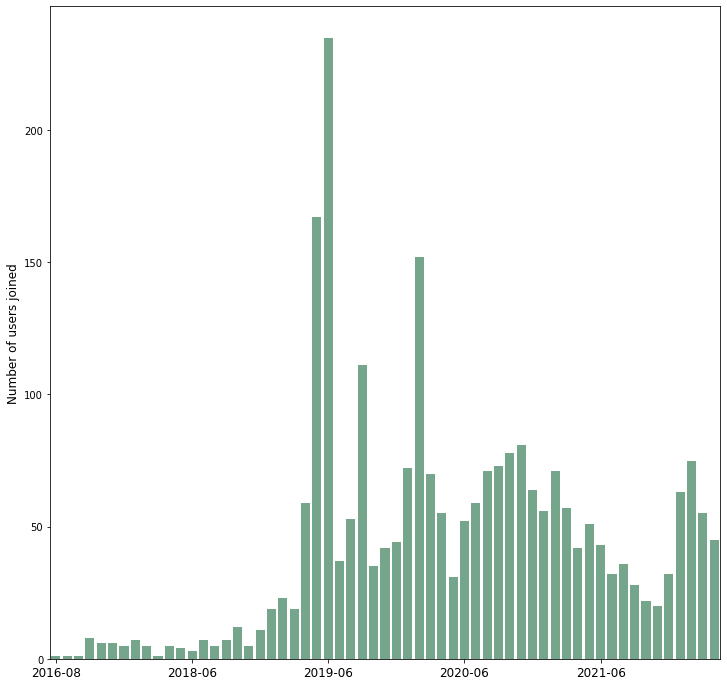

In [9]:
# Visualisation
plt.rc('xtick', labelsize=12)
fig3 = plt.figure(figsize = (12,12))
ax = sns.barplot(x="Year-Month",y ="count", data=number_user_month, color="seagreen", alpha= 0.7)
ax.xaxis.set_major_locator(ticker.MultipleLocator(12))
plt.ylabel("Number of users joined", fontsize=12)
plt.xlabel("")
# plt.savefig("Monthly new user sign up.png")

#### Question 3: - How many users have completed at least 1 PROM?

Similar to Question 2, as assumption stated in the document:"A PROM is completed when ‘prom_created_at’ has a value". We only seek for users with value in 'prom_created_at' . We want to find out the number of unique users that have at least 1 PROM.

In [10]:
# Remomving all the user with NA value in prom_created_at
new_prom_df = prom_df.copy()
new_prom_df = new_prom_df.dropna(subset=['prom_created_at'])
new_prom_df = new_prom_df.drop_duplicates(subset=None, keep='first', inplace=False) # removes any duplicated data
print("The total record without NA value in 'prom_created_at':",len(new_prom_df))


prom_users = new_prom_df.groupby(["user_id"])["prom_created_at"].nunique()
print("Number of user that have completed at least 1 PROM:", len(prom_users))
#All the users have completed at least 1 PROM

prom_completed = prom_df["prom_created_at"].notna().sum()


The total record without NA value in 'prom_created_at': 23079
Number of user that have completed at least 1 PROM: 2530


#### Question 4: - How many PROMs are completed each week/month? You can decide on the cadence.

In [11]:
# Month:
# Turning the 'prom_created_at' into datetime field, then breaking into month-year format.
new_prom_df['prom_created_at']= pd.to_datetime(new_prom_df['prom_created_at'])
new_prom_df['Year-Month'] = new_prom_df['prom_created_at'].dt.to_period('M')
number_prom_month = new_prom_df.groupby(["Year-Month"])["user_id"].agg(["count"])
number_prom_month.reset_index(inplace=True)
number_prom_month.head()

Year-Month  count
0    2016-08      2
1    2016-09      2
2    2016-10      9
3    2017-07      9
4    2017-09     15

Text(0.5, 0, 'Year-Month')

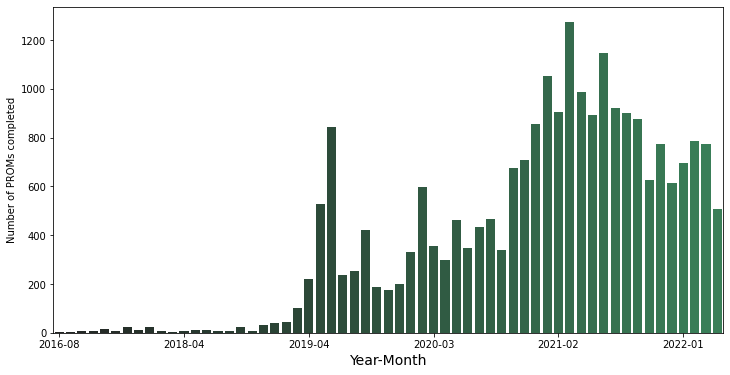

In [12]:
# Visualisation

plt.rc('xtick', labelsize=10)
fig = plt.figure(figsize = (12,6))
colour = sns.dark_palette("seagreen", n_colors = 59)
ax = sns.barplot(x="Year-Month",y ="count", data=number_prom_month,  palette=colour)
                 
# color='seagreen', alpha= 0.7)
ax.xaxis.set_major_locator(ticker.MultipleLocator(11))
plt.ylabel("Number of PROMs completed")
plt.xlabel("Year-Month", fontsize=14)
# plt.savefig("Month Prom.png")

In [13]:
# Week
new_prom_df['Year-Week'] = new_prom_df['prom_created_at'].dt.strftime('%Y-%U')
number_prom_week = new_prom_df.groupby(["Year-Week"])["user_id"].agg(["count"])
number_prom_week.reset_index(inplace=True)
number_prom_week

Year-Week  count
0     2016-33      2
1     2016-37      2
2     2016-41      9
3     2017-27      6
4     2017-31      3
..        ...    ...
217   2022-12    149
218   2022-13    158
219   2022-14    236
220   2022-15    145
221   2022-16     81

[222 rows x 2 columns]

Text(0.5, 0, 'Year-Week')

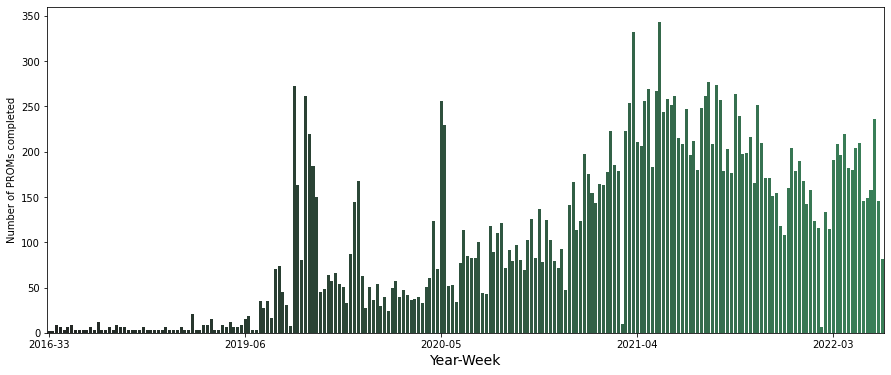

In [14]:
# Visualisation

plt.rc('xtick', labelsize=10)
fig = plt.figure(figsize = (15,6))
colour = sns.dark_palette("seagreen", n_colors = 222)
ax = sns.barplot(x="Year-Week",y ="count", data=number_prom_week, palette=colour)
ax.xaxis.set_major_locator(ticker.MultipleLocator(52))
plt.ylabel("Number of PROMs completed")
plt.xlabel("Year-Week", fontsize=14)
# plt.savefig("Week prom.png")

#### Question 5: - How many users have each condition?

In [15]:
medical_df['condition'].value_counts()

Crohn’s disease        1339
Ulcerative colitis     1134
IBDU                     71
Pouchitis                17
Microscopic Colitis      15
Celiac                    6
Name: condition, dtype: int64

Text(0, 0.5, 'Number of users')

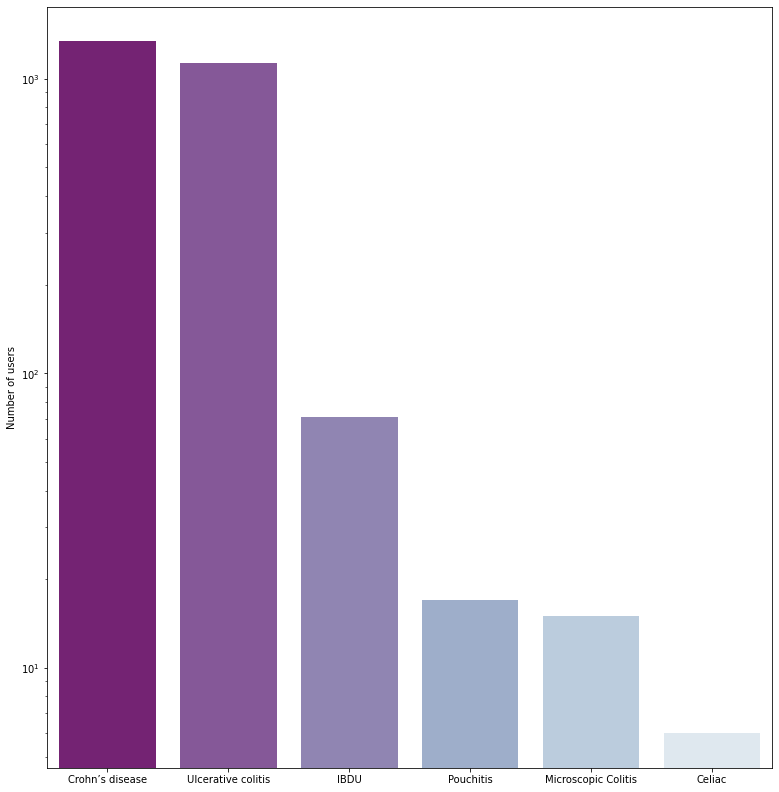

In [16]:
# Visualisation 

fig = plt.figure(figsize = (13,14))
colour = sns.color_palette("BuPu_r")

ax = sns.countplot(x="condition", data=medical_df, palette=colour, order = medical_df["condition"].value_counts().index)
ax.set_yscale("log")
plt.xlabel("")
plt.ylabel("Number of users")

# plt.savefig("total condition.png",bbox_inches='tight',dpi=100)

#### Question 6: - What other data attributes would you like to see in the data set, what else could be useful?

Essentially, we want data that can help us understand/ answer the outlined business task, and giving insights to the stakeholders. Some useful data could be

Board of directors:
1. More demographic data of the users 
2. The cost of each running each PROMs 
3. If there is any user stop using the company's service ? (churn rate)

Clinicians:
1. More detailed information for each PROMs ( how are the PROMs scored?)
2. How many or what type of treatments each patients undergone ?
3. General patient's information: weight, height, BMI etc


#### Question 7: - How many users do we have in each age group; 0-25, 26-50, 51-70, 70+

In [17]:
# Removing the users without DOB
user_new_df= user_df.copy()
user_new_df=user_new_df.dropna()


# calculate age
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
        
user_new_df['Age'] = user_new_df['date_of_birth'].apply(age)

In [18]:
# Check for outlier/ error

# check for outlier
print(user_new_df.loc[user_new_df['Age'] >= 100 ])
print(user_new_df.loc[user_new_df['Age'] <= 0 ])
# one record has outlier

# Correcting the date_of_birth 
user_new_df.loc[2348, "date_of_birth"] = "1978-03-20"

# Reapply the age 
user_new_df['Age'] = user_new_df['date_of_birth'].apply(age)


      user_id      user_created_at  gender date_of_birth   Age
2348     3326  2019-06-11 12:44:17  Female    0078-03-20  1944
Empty DataFrame
Columns: [user_id, user_created_at, gender, date_of_birth, Age]
Index: []


In [19]:
# AgeGroup
label = ["0-25","26-50","51-70","70+"]
user_new_df['Age Group'] = pd.cut(user_new_df['Age'], bins =[0,26,51,71, 100], labels=label)
age_group_number = user_new_df.groupby(user_new_df["Age Group"])["user_id"].agg(["count"])
age_group_number.reset_index(inplace=True)

Text(0.5, 0, 'Age Group')

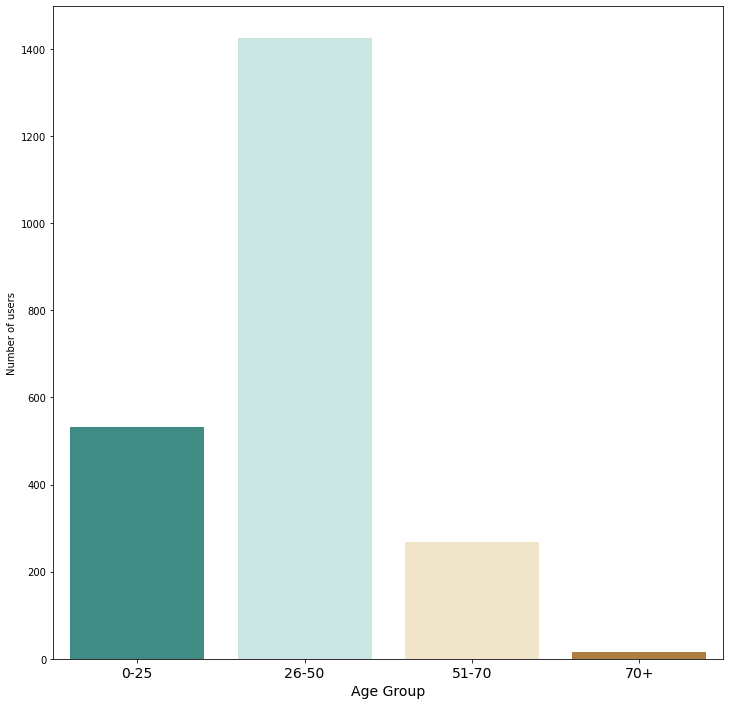

In [20]:
# Visualisation

plt.rc('xtick', labelsize=14)
fig = plt.figure(figsize = (12,12))

ax = sns.barplot(x="Age Group",y ="count", data=age_group_number, palette= "BrBG_r")
plt.ylabel("Number of users")
plt.xlabel("Age Group", fontsize=14)

# plt.savefig("Age group sign up.png")

#### Question 8: - Are there any other interesting trends you have noticed?

a few things we can investigate:
1. <b><u>The number of each PROM administered</u></b>: 

We can get a good idea of how many PROM is administered. Then think about if is really neccessary to keep investing in the PROMs that is hardly used.

2. <b><u>The total number of each gender user</u></b>: 

We can get a better picture of the customer demographic

3. <b><u>Average PROM scores</u></b>: 

We get an overview of how a patient felt about a specfic PROM

4. <b><u> The total number of each condition </u></b>: 

We get an idea of how many conditions our patient usually have.

5. <b><u>Total diagnosis in each hostpital, broken down by condition</u></b>: 

We can understand which are the better/ more accessible hospital: then the company can decide if they want to invest more into the relationship with them; the clinician can understand which hospital has better facilities to deal with the patients

6. <b><u>Age group of patients when diagnose of condition</u></b>:

Understand which conditions are prevalent in each age group

7. <b><u>The number of diagnosed condition each day, separated by hospital</u></b>: 

Get an overview of how the number of times a condition is diagnosed

8. <b><u>The average PROM score for age groups</u></b>: 

Assessing which age group has better response to PROM



**The codes below show how each information are processed, some thought process and data visualisations



### 1. The number of each PROM administered.


In [21]:
each_prom_number = new_prom_df["prom_name"].value_counts()
each_prom_number 

Symptoms Questionnaire (IBD Control)                                7944
SSQ                                                                 5847
HBI                                                                 5250
SCCAI                                                               3379
SLEEP DIARY                                                          336
Patient Survey - Pre-deployment                                      122
Acceptance & Committment Therapy Survey (ACT)                         43
Chronic Pain Grade Scale                                              36
Inflammatory Bowel Disease-Fatigue (IBD-F) Self-assessment Scale      36
GAD-7                                                                 36
Medication Categories                                                 24
COVID-19                                                              12
Your experience with physical activity                                 8
Your experience with relationships                 

Text(0, 0.5, '')

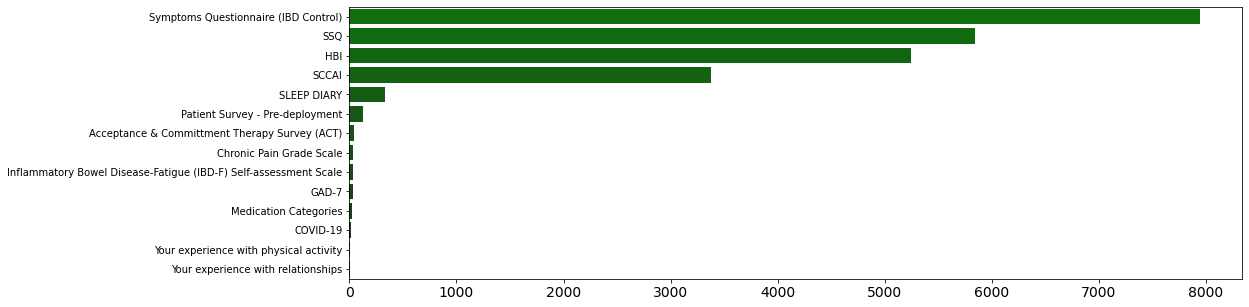

In [22]:
# Visualisation

fig = plt.figure(figsize = (16,5))
colour = sns.dark_palette("Green", 16, reverse= True)

ax = sns.countplot(y="prom_name", data=new_prom_df, palette=colour, order = new_prom_df["prom_name"].value_counts().index)
plt.xlabel("")
plt.ylabel("")

# plt.savefig("PROM number.png",bbox_inches='tight',dpi=100)

### 2. Total number of each gender user

In [23]:
gender_number = new_user_df["gender"].value_counts()
gender_number

Female     1484
Male        830
Unknown     216
Name: gender, dtype: int64

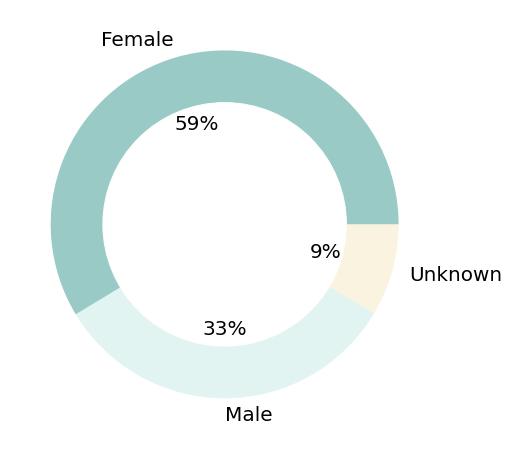

In [24]:
# Visualisation

fig = plt.figure(figsize = (8,8))

colour=sns.color_palette("BrBG_r", 4)

gender_number.plot(kind="pie", colors = colour, wedgeprops={'alpha':0.5}, autopct='%.0f%%', textprops={'fontsize': 20})
plt.ylabel("")

circle = plt.Circle( (0,0), 0.7, color='white')
p = plt.gcf()
p.gca().add_artist(circle)
# plt.savefig("Gender.png",bbox_inches='tight',dpi=100)

### 3. Average PROM Score

In [25]:
each_prom_number = new_prom_df["prom_name"].value_counts()
average_prom_score = new_prom_df.groupby(new_prom_df["prom_name"])["prom_score"].agg(["count", "max", "min","mean", "std"]).sort_values(by=["mean"], ascending =False)
average_prom_score

count   max   min  \
prom_name                                                               
Your experience with physical activity                  8  28.0  14.0   
Chronic Pain Grade Scale                               36  62.0   0.0   
Your experience with relationships                      6  25.0  20.0   
Inflammatory Bowel Disease-Fatigue (IBD-F) Self...     36  17.0   0.0   
Acceptance & Committment Therapy Survey (ACT)          43  17.0   6.0   
Symptoms Questionnaire (IBD Control)                 7944  17.0   0.0   
SSQ                                                  5847  12.0   0.0   
GAD-7                                                  36  18.0   0.0   
SCCAI                                                3379  18.0   0.0   
COVID-19                                               12   7.0   3.0   
HBI                                                  5250  97.0   0.0   
Medication Categories                                  24   0.0   0.0   
Patient Survey - Pre-deployment                       122   0.0   0.0   
SLEEP DIARY                                           336   0.0   0.0   

                                                         mean        std  
prom_name                                                                 
Your experience with physical activity              25.000000   4.598136  
Chronic Pain Grade Scale                            23.972222  20.976839  
Your experience with relationships                  22.666667   1.966384  
Inflammatory Bowel Disease-Fatigue (IBD-F) Self...  12.166667   4.638349  
Acceptance & Committment Therapy Survey (ACT)       11.813953   2.322312  
Symptoms Questionnaire (IBD Control)                 9.102090   4.986349  
SSQ                                                  7.848298   3.382059  
GAD-7                                                7.388889   5.718530  
SCCAI                                                5.215152   3.838379  
COVID-19                                             4.916667   1.729862  
HBI                                                  4.145143   4.416698  
Medication Categories                                0.000000   0.000000  
Patient Survey - Pre-deployment                      0.000000   0.000000  
SLEEP DIARY                                          0.000000   0.000000

Medication Categories, SLEEP DIARY and Patient Survey- Pre-deployment do not seemed to have a prom_score associated with them. Therefore, they are dropped from the data.

In [26]:
average_prom_score_df = new_prom_df.copy()
average_prom_score_df = average_prom_score_df.set_index("prom_name")
average_prom_score_df = average_prom_score_df.drop(
    labels=['Patient Survey - Pre-deployment','Medication Categories','SLEEP DIARY'], axis = 0, inplace= False)

average_prom_score_df.reset_index(inplace=True)
average_prom_score = average_prom_score_df.groupby(average_prom_score_df["prom_name"])["prom_score"].agg(["count", "max", "min","mean", "std"]).reset_index().sort_values(by=["mean"], ascending =False)
average_prom_score

prom_name  count   max   min  \
9              Your experience with physical activity      8  28.0  14.0   
2                            Chronic Pain Grade Scale     36  62.0   0.0   
10                 Your experience with relationships      6  25.0  20.0   
5   Inflammatory Bowel Disease-Fatigue (IBD-F) Sel...     36  17.0   0.0   
0       Acceptance & Committment Therapy Survey (ACT)     43  17.0   6.0   
8                Symptoms Questionnaire (IBD Control)   7944  17.0   0.0   
7                                                 SSQ   5847  12.0   0.0   
3                                               GAD-7     36  18.0   0.0   
6                                               SCCAI   3379  18.0   0.0   
1                                            COVID-19     12   7.0   3.0   
4                                                 HBI   5250  97.0   0.0   

         mean        std  
9   25.000000   4.598136  
2   23.972222  20.976839  
10  22.666667   1.966384  
5   12.166667   4.638349  
0   11.813953   2.322312  
8    9.102090   4.986349  
7    7.848298   3.382059  
3    7.388889   5.718530  
6    5.215152   3.838379  
1    4.916667   1.729862  
4    4.145143   4.416698

Text(0.5, 0, 'PROM Score')

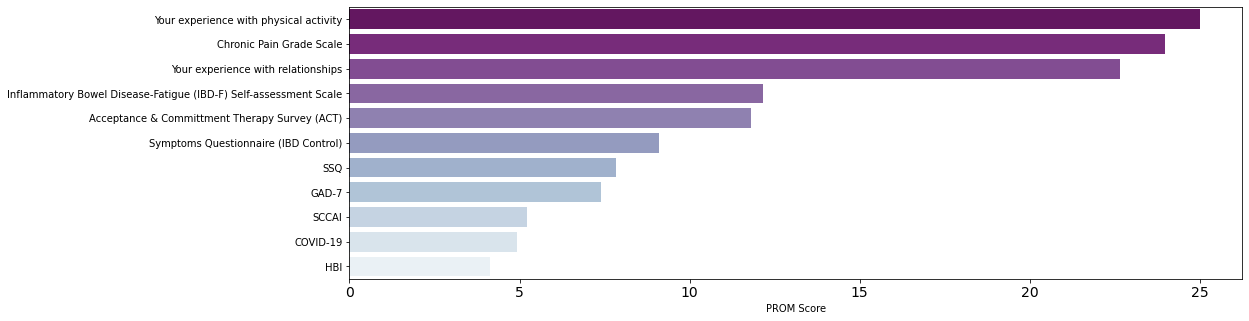

In [27]:
# Visualisation 

fig = plt.figure(figsize = (16,5))

ax = sns.barplot(y="prom_name", x ='mean', data=average_prom_score, palette ="BuPu_r" , order=average_prom_score["prom_name"])

plt.ylabel("")
plt.xlabel("PROM Score")
# plt.savefig("average prom score.png",bbox_inches='tight',dpi=100 )

### 4. How many condition each user has?

In [28]:
medicalcond_df = medical_df.copy()
medicalcond_df["user_id"].value_counts()

4656     19
430       5
2182      5
360       4
7737      3
         ..
1536      1
1821      1
1895      1
2022      1
30799     1
Name: user_id, Length: 2530, dtype: int64

In [29]:
medicalcond_df = medical_df.copy()
medicalcond_df.head()

## Count the total condition of each patient
total_condition_count = medicalcond_df.groupby(medicalcond_df["user_id"])["condition"].agg([pd.Series.nunique])
total_condition_count

# ## Merge the two dataframe
medicalcond_df = pd.merge(medicalcond_df, total_condition_count, how="inner", on="user_id")
medicalcond_df.rename(columns={"nunique":"Total condition"}, inplace=True)


condition_count = medicalcond_df.groupby(medicalcond_df["Total condition"])["user_id"].agg([pd.Series.nunique])
condition_count.rename(columns={"nunique":"count"}, inplace=True)
condition_count.reset_index(inplace = True)


Text(0, 0.5, 'Total number of condition(s)')

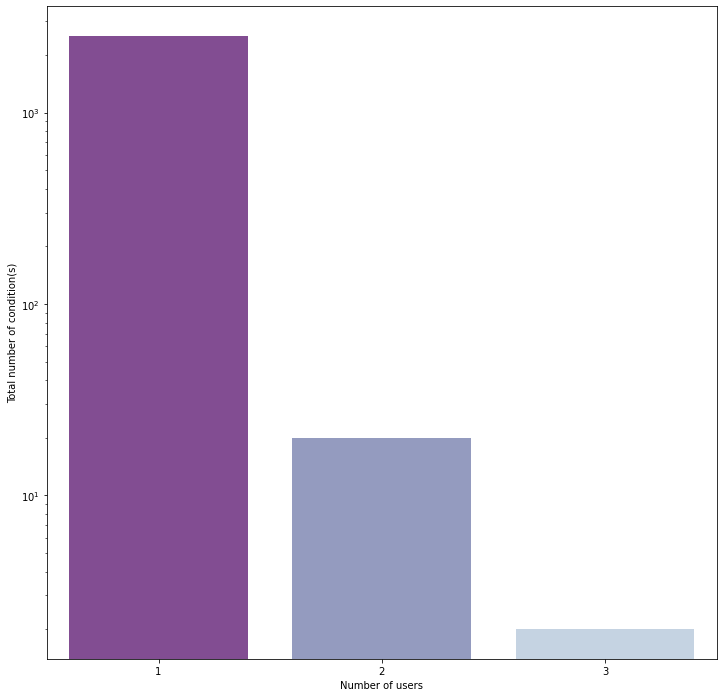

In [30]:
## Visualisation 

ys = [1988, 301, 860, 77, 13, 1]

fig = plt.figure(figsize = (12,12))

ax = sns.barplot(x="Total condition", y ='count', palette="BuPu_r",  data=condition_count)
ax.set_yscale("log")
plt.xticks(fontsize =10)
plt.xlabel("Number of users")
plt.ylabel("Total number of condition(s)")

# plt.savefig("each user condition.png", bbox_inches ="tight", dpi = 100)

### 5. Total diagnosis in each hospital, broken down by condition

In [31]:
hospital_df = medical_df.copy()
# a patient can visit multiple hospital. Hence total > 2530
hospital_number = hospital_df.groupby(["hospital_name"])["user_id"].agg("count")
hospital_number

hospital_name
Hospital 1    1010
Hospital 2     464
Hospital 3     350
Hospital 4     400
Hospital 5     358
Name: user_id, dtype: int64

In [32]:
hospital_condition = hospital_df.groupby(["hospital_name","condition"])["user_id"].agg("count")
hospital_condition= hospital_condition.reset_index()
hospital_condition.rename(columns={"user_id":"count"}, inplace=True)
hospital_condition


hospital_name            condition  count
0     Hospital 1               Celiac      2
1     Hospital 1      Crohn’s disease    532
2     Hospital 1                 IBDU     18
3     Hospital 1  Microscopic Colitis      6
4     Hospital 1            Pouchitis      9
5     Hospital 1   Ulcerative colitis    443
6     Hospital 2               Celiac      3
7     Hospital 2      Crohn’s disease    228
8     Hospital 2                 IBDU     15
9     Hospital 2  Microscopic Colitis      2
10    Hospital 2            Pouchitis      2
11    Hospital 2   Ulcerative colitis    214
12    Hospital 3               Celiac      1
13    Hospital 3      Crohn’s disease    164
14    Hospital 3                 IBDU     18
15    Hospital 3  Microscopic Colitis      4
16    Hospital 3            Pouchitis      3
17    Hospital 3   Ulcerative colitis    160
18    Hospital 4      Crohn’s disease    215
19    Hospital 4                 IBDU     16
20    Hospital 4  Microscopic Colitis      2
21    Hospital 4            Pouchitis      1
22    Hospital 4   Ulcerative colitis    166
23    Hospital 5      Crohn’s disease    200
24    Hospital 5                 IBDU      4
25    Hospital 5  Microscopic Colitis      1
26    Hospital 5            Pouchitis      2
27    Hospital 5   Ulcerative colitis    151

In [33]:
#Extract the data requried to build visualisation

# Celiac
hospital_celiac = hospital_condition['count'].where(hospital_condition['condition'] == "Celiac").dropna().tolist()
hospital_celiac.extend([0,0]) # Hospital 4 and Hospital 5 do not diagnose Celiac
hospital_celiac= np.array(hospital_celiac)
# Crohn disease
hospital_Crohn = np.array(hospital_condition['count'].where(hospital_condition['condition'] == "Crohn’s disease").dropna())

# IBDU
hospital_IBDU = np.array(hospital_condition['count'].where(hospital_condition['condition'] == "IBDU").dropna())

# Microscopic Colitis
hospital_Micro = np.array(hospital_condition['count'].where(hospital_condition['condition'] == "Microscopic Colitis").dropna())

# Pouchitis
hospital_Pou = np.array(hospital_condition['count'].where(hospital_condition['condition'] == "Pouchitis").dropna())
hospital_Pou

# Ulcerative colitis
hospital_Ulc = np.array(hospital_condition['count'].where(hospital_condition['condition'] == "Ulcerative colitis").dropna())
hospital_Ulc
x = ["Hospital 1","Hospital 2","Hospital 3","Hospital 4","Hospital 5"]

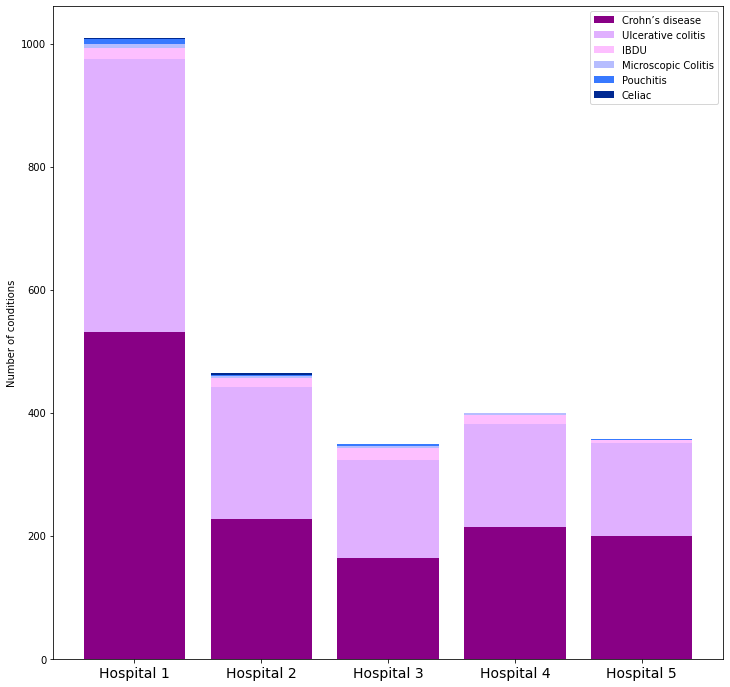

In [34]:
# Visualisation

# fig= plt.figure(figsize = (12,12))
fig, ax =plt.subplots(figsize = (12,12))

ax.bar(x, hospital_Crohn, label='Crohn’s disease', color="#880085")

ax.bar(x, hospital_Ulc, label='Ulcerative colitis', color = "#e0b0ff", bottom=hospital_Crohn)
ax.bar(x, hospital_IBDU, label='IBDU', color ="#fdbfff",bottom=hospital_Ulc+ hospital_Crohn)
ax.bar(x, hospital_Micro, label='Microscopic Colitis', color= "#b6bdff",bottom=hospital_IBDU+hospital_Ulc+hospital_Crohn)
ax.bar(x, hospital_Pou, label='Pouchitis', color = "#3879ff",bottom=hospital_Micro+hospital_IBDU+hospital_Ulc+hospital_Crohn)
ax.bar(x, hospital_celiac, label='Celiac', color="#002992", bottom= hospital_Pou+ hospital_Micro+ hospital_IBDU+ hospital_Ulc+ hospital_Crohn)


plt.ylabel("Number of conditions")
plt.xlabel("")
plt.legend(["Crohn’s disease", "Ulcerative colitis", "IBDU", "Microscopic Colitis", "Pouchitis", "Celiac"])

# plt.savefig("hospital.png", bbox_inches ="tight", dpi =100)

### 6. Patient's age group with condition 

In [35]:
age_condition_df = pd.merge(hospital_df, user_new_df, how="inner", on="user_id")
age_condition_number = age_condition_df.groupby(["Age Group","condition"])["user_id"].agg(["count"])
age_condition_number.reset_index(inplace=True)
age_condition_number

Age Group            condition  count
0       0-25               Celiac      0
1       0-25      Crohn’s disease    312
2       0-25                 IBDU     20
3       0-25  Microscopic Colitis      2
4       0-25            Pouchitis      1
5       0-25   Ulcerative colitis    208
6      26-50               Celiac      4
7      26-50      Crohn’s disease    726
8      26-50                 IBDU     32
9      26-50  Microscopic Colitis      7
10     26-50            Pouchitis     13
11     26-50   Ulcerative colitis    679
12     51-70               Celiac      2
13     51-70      Crohn’s disease    139
14     51-70                 IBDU     11
15     51-70  Microscopic Colitis      3
16     51-70            Pouchitis      2
17     51-70   Ulcerative colitis    116
18       70+               Celiac      0
19       70+      Crohn’s disease      7
20       70+                 IBDU      0
21       70+  Microscopic Colitis      1
22       70+            Pouchitis      0
23       70+   Ulcerative colitis      7

In [36]:
#Extract the data requried to build visualisation

# Celiac
age_celiac = age_condition_number['count'].where(age_condition_number['condition'] == "Celiac").dropna().tolist()
age_celiac=np.array(age_celiac)

# Crohn disease
age_Crohn = np.array(age_condition_number['count'].where(age_condition_number['condition'] == "Crohn’s disease").dropna())

# IBDU
age_IBDU = age_condition_number['count'].where(age_condition_number['condition'] == "IBDU").dropna().tolist()
age_IBDU=np.array(age_IBDU)

# Microscopic Colitis
age_Micro = age_condition_number['count'].where(age_condition_number['condition'] == "Microscopic Colitis").dropna().tolist()
age_Micro=np.array(age_Micro)

# Pouchitis
age_Pou = age_condition_number['count'].where(age_condition_number['condition'] == "Pouchitis").dropna().tolist()
age_Pou=np.array(age_Pou)

# Ulcerative colitis
age_Ulc = age_condition_number['count'].where(age_condition_number['condition'] == "Ulcerative colitis").dropna().tolist()
age_Ulc=np.array(age_Ulc)

x = ["0-25","26-50","51-70","70+"]


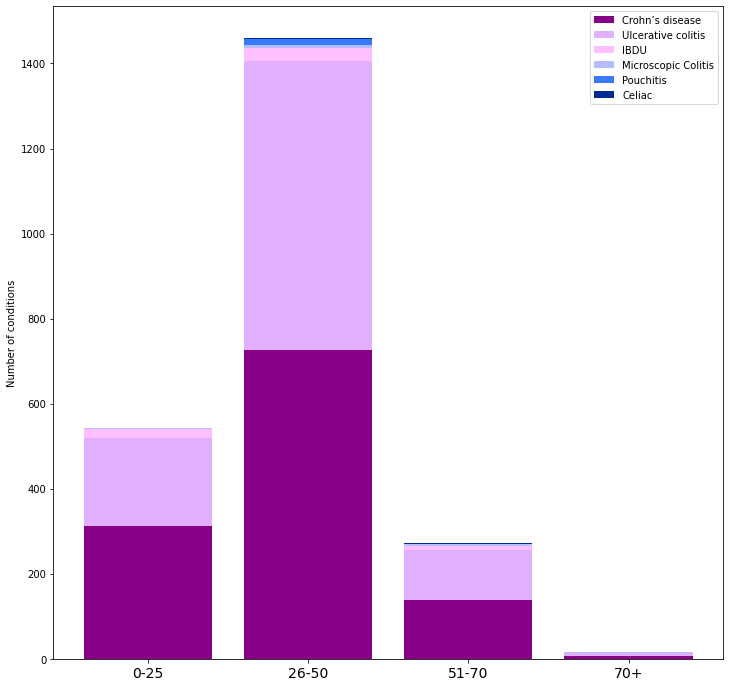

In [37]:
# Visualisation

# fig= plt.figure(figsize = (12,12))
fig, ax =plt.subplots(figsize = (12,12))

ax.bar(x, age_Crohn, color="#880085", label='Crohn’s disease')
ax.bar(x, age_Ulc,  color = "#e0b0ff", label='Ulcerative colitis', bottom=age_Crohn)
ax.bar(x, age_IBDU, color ="#fdbfff",  label='IBDU', bottom=age_Ulc+ age_Crohn)
ax.bar(x, age_Micro,  color= "#b6bdff",  label='Microscopic Colitis', bottom=age_IBDU+age_Ulc+age_Crohn)
ax.bar(x, age_Pou,color = "#3879ff",  label='Pouchitis', bottom=age_Micro+age_IBDU+age_Ulc+age_Crohn)
ax.bar(x, age_celiac, color="#002992",label='Celiac', bottom= age_Pou+ age_Micro+ age_IBDU+ age_Ulc+ age_Crohn)


plt.ylabel("Number of conditions")
plt.xlabel("")
plt.legend(["Crohn’s disease", "Ulcerative colitis", "IBDU", "Microscopic Colitis", "Pouchitis", "Celiac"])
# plt.savefig("age group condition.png", bbox_inches ="tight", dpi =100)

### 7. The number of diagnosed condition each day, separated by hospital.

In [38]:
hospital_df = medical_df.copy()

# seemed to have an error diagnosed date :1812 -11
# correcting to 2012-11
hospital_df.loc[8, "date_diagnosed"] = "2012-11-02"


idx = pd.date_range('1955-07', '2022-04',freq="D")
df = pd.DataFrame(data=idx, columns=['date_diagnosed'])


hospital_df['date_diagnosed']= pd.to_datetime(hospital_df['date_diagnosed'])

diagnosed_df = pd.merge(hospital_df,df, how="outer", on="date_diagnosed")

diagnosed_df['date_diagnosed'] = pd.to_datetime(diagnosed_df['date_diagnosed'], errors='coerce')
diagnosed_df['date_diagnosed']= pd.to_datetime(diagnosed_df['date_diagnosed'])
diagnosed_df['Year-Month'] = diagnosed_df['date_diagnosed'].dt.to_period('M')
diagnosed_count= diagnosed_df.groupby(diagnosed_df["Year-Month"])["user_id"].agg(["count"])
diagnosed_count.reset_index(inplace=True)
diagnosed_count

Year-Month  count
0      1955-07      1
1      1955-08      0
2      1955-09      0
3      1955-10      0
4      1955-11      0
..         ...    ...
797    2021-12      6
798    2022-01      6
799    2022-02      5
800    2022-03      3
801    2022-04      1

[802 rows x 2 columns]

Text(0.5, 0, '')

<Figure size 864x864 with 0 Axes>

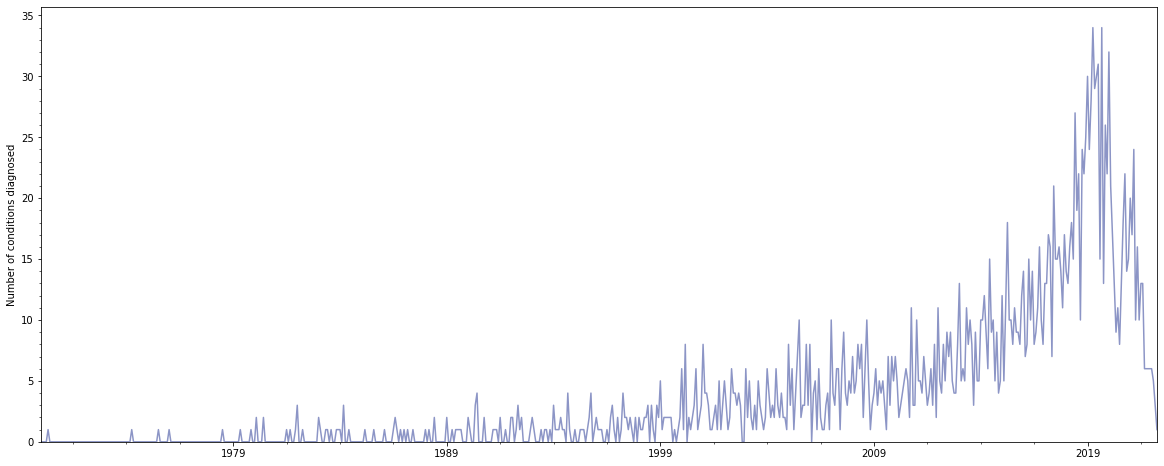

In [39]:
# Visualise

plt.rc('xtick', labelsize=10)
fig = plt.figure(figsize = (12,12))
# diagnosed_count["Year-Month"]

colour = sns.color_palette("BuPu", 1 )
# ax = sns.lineplot( data=diagnosed_count,x="Year-Month",y ="count", color='seagreen', alpha= 0.7)
# ax = sns.lineplot(data=diagnosed_count, color='seagreen', alpha= 0.7)
ax = diagnosed_count.plot.line(x='Year-Month', y='count', color=colour, figsize=(20,8))
plt.minorticks_on()
plt.xlim(0)
plt.ylim(0)
plt.ylabel("Number of conditions diagnosed")
ax.get_legend().remove()
# ax.xaxis.set_major_locator(ticker.MultipleLocator(24))
plt.xlabel("")
# plt.xlabel("Date", fontsize=14)
# plt.savefig("Date diagnosed.png", bbox_inches ="tight", dpi =100)

### Average prom score for age groups.

In [40]:
age_prom_df = pd.merge(average_prom_score_df, user_new_df, how="inner", on="user_id")
age_prom_df = age_prom_df.groupby(["Age Group"])["prom_score"].agg(["mean"])
age_prom_df.reset_index(inplace=True)


Text(0.5, 0, 'Age Group')

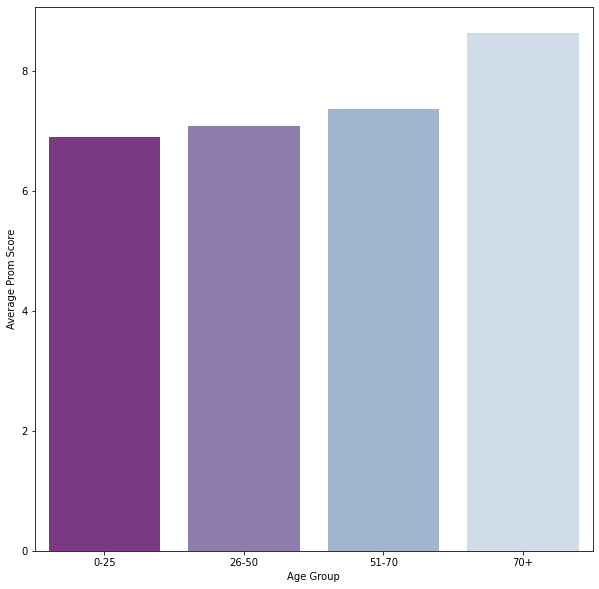

In [41]:
# Visualisation 

fig = plt.figure(figsize = (10,10))

ax = sns.barplot(x="Age Group", y ='mean', data=age_prom_df, palette ="BuPu_r" , order=age_prom_df["Age Group"])
plt.ylabel("Average Prom Score")
plt.xlabel("Age Group")
# plt.savefig("average prom score age.png",bbox_inches='tight',dpi=100 )